<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


-   Extract information from a given web site 
-   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd #for saving data to csv
import csv 

Download the webpage at the url


In [41]:
#your code goes here
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text 

Create a soup object


In [42]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [43]:
#your code goes here
table = soup.find('table') # in html table is represented by the tag <table>

In [44]:
language_salary_list = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    Language= cols[1].getText()
    Average_Annual_Salary=cols[3].getText()
    language_salary=[Language,Average_Annual_Salary]
    language_salary_list.append(language_salary)
    
print(language_salary_list)

[['Language', 'Average Annual Salary'], ['Python', '$114,383'], ['Java', '$101,013'], ['R', '$92,037'], ['Javascript', '$110,981'], ['Swift', '$130,801'], ['C++', '$113,865'], ['C#', '$88,726'], ['PHP', '$84,727'], ['SQL', '$84,793'], ['Go', '$94,082']]


Save the scrapped data into a file named _popular-languages.csv_


In [45]:
# your code goes here
import csv
with open('popular-languages.csv','w', newline='') as file:
    csvwriter = csv.writer(file)
    for row in language_salary_list:
        csvwriter.writerow(row)

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
df = pd.read_csv('popular-languages.csv')
df.columns =  ['Language','Average Annual Salary']
df.head(10)

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [76]:
df = pd.DataFrame(data)
df
df = df.replace(',', '', regex=True)

In [79]:
df["Average Annual Salary"] = df["Average Annual Salary"].str.replace("$","").astype(float)

In [84]:
df

,Language,Average Annual Salary
0,Python,114383.0
1,Java,101013.0
2,R,92037.0
3,Javascript,110981.0
4,Swift,130801.0
5,C++,113865.0
6,C#,88726.0
7,PHP,84727.0
8,SQL,84793.0
9,Go,94082.0


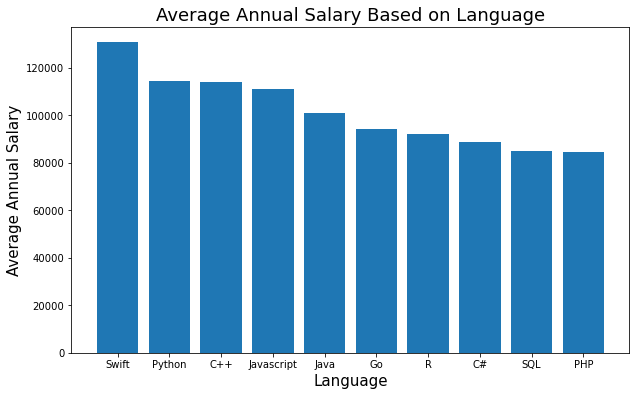

In [85]:
df_sorted_desc= df1.sort_values('Average Annual Salary',ascending=False)
                               
                               
                               
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Language', 'Average Annual Salary',data=df_sorted_desc)
plt.xlabel("Language", size=15)
plt.ylabel("Average Annual Salary", size=15)
plt.title("Average Annual Salary Based on Language", size=18)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
